In [56]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [57]:
n_samples = 100000

np.random.seed(42)

data = {
    "age": np.random.randint(18 * 365, 65 * 365, size=n_samples),  
    "height": np.random.randint(140, 200, size=n_samples),  
    "weight": np.round(np.random.uniform(40, 150, size=n_samples), 1),  
    "gender": np.random.choice([1, 2], size=n_samples),  
    "ap_hi": np.random.randint(90, 180, size=n_samples),  
    "ap_lo": np.random.randint(60, 120, size=n_samples), 
    "cholesterol": np.random.choice([1, 2, 3], size=n_samples, p=[0.6, 0.3, 0.1]), 
    "gluc": np.random.choice([1, 2, 3], size=n_samples, p=[0.7, 0.2, 0.1]),  
    "smoke": np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2]), 
    "alco": np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1]),  
    "active": np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3]),  
    "cardio": np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])  
}

df = pd.DataFrame(data)

print(df.head())

df.to_csv("medical_examination_data.csv", index=False)


     age  height  weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  22365     181    77.4       2    162    118            2     3      0   
1   7430     179   104.1       1     93     90            1     2      1   
2  11960     155    82.0       1    127     64            1     1      0   
3  18534     174    98.1       2    109     79            3     1      0   
4  17854     188   125.3       1    163    108            1     2      1   

   alco  active  cardio  
0     0       0       0  
1     0       1       1  
2     0       1       0  
3     0       0       0  
4     0       1       0  


In [58]:
df.info

<bound method DataFrame.info of          age  height  weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      22365     181    77.4       2    162    118            2     3      0   
1       7430     179   104.1       1     93     90            1     2      1   
2      11960     155    82.0       1    127     64            1     1      0   
3      18534     174    98.1       2    109     79            3     1      0   
4      17854     188   125.3       1    163    108            1     2      1   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
99995  15192     175   102.1       2    158     80            1     1      0   
99996  20245     176    95.3       2     96     67            1     1      0   
99997   6887     184   108.8       2    146    108            1     3      1   
99998  16642     146   138.6       2    116    112            1     2      0   
99999   7275     182    69.0       1    129     72            2     1      1   

       

In [59]:
df["BMI"]=df["weight"]/((df["height"]/100)**2).astype(int)

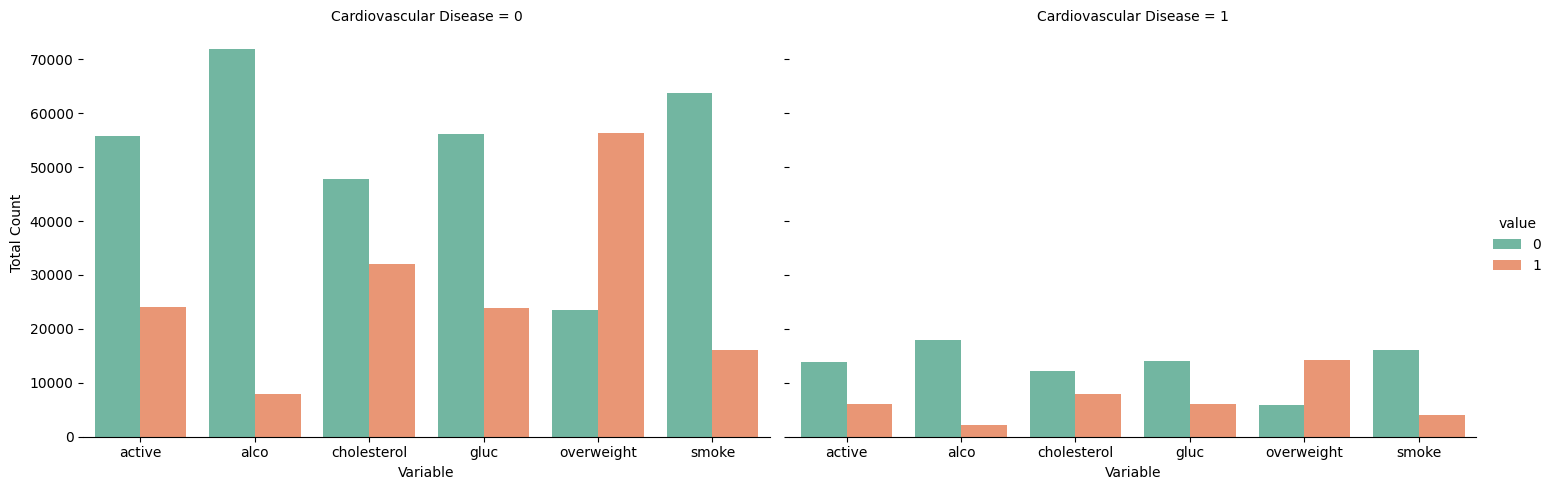

In [ ]:
df["overweight"] = (df["weight"] / ((df["height"] / 100) ** 2) > 25).astype(int)

df["cholesterol"] = df["cholesterol"].apply(lambda x: 0 if x == 1 else 1)
df["gluc"] = df["gluc"].apply(lambda x: 0 if x == 1 else 1)

df_cat = pd.melt(
    df,
    id_vars=["cardio"],
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    var_name="variable",
    value_name="value",
)

df_cat = (
    df_cat.groupby(["cardio", "variable", "value"])
    .size()
    .reset_index(name="total")
)

fig = sns.catplot(
    data=df_cat,
    kind="bar",
    x="variable",
    y="total",
    hue="value",
    col="cardio",
    palette="Set2",
    height=5,
    aspect=1.5,
)

fig.set_axis_labels("Variable", "Total Count")
fig.set_titles("Cardiovascular Disease = {col_name}")
fig.despine(left=True)

plt.show()


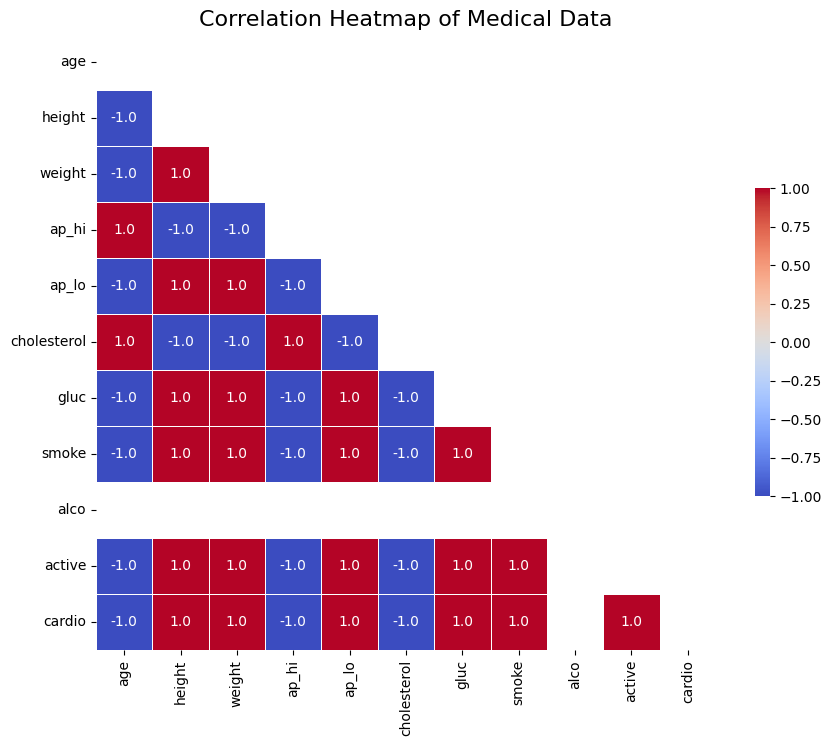

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "age": [22365, 7430, 11960, 18534, 17854],
    "height": [181, 179, 155, 174, 188],
    "weight": [77.4, 104.1, 82.0, 98.1, 125.3],
    "ap_hi": [162, 93, 127, 109, 163],
    "ap_lo": [118, 90, 64, 79, 108],
    "cholesterol": [2, 1, 1, 3, 1],
    "gluc": [3, 2, 1, 1, 2],
    "smoke": [0, 1, 0, 0, 1],
    "alco": [0, 0, 0, 0, 0],
    "active": [0, 1, 1, 0, 1],
    "cardio": [0, 1, 0, 0, 0],
}
df = pd.DataFrame(data)

def draw_heat_map():

    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(10, 8))

    
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,        
        fmt=".1f",        
        cmap="coolwarm",   
        vmax=1, vmin=-1,  
        cbar_kws={"shrink": 0.5},  
        linewidths=0.5     
    )

    plt.title("Correlation Heatmap of Medical Data", fontsize=16)

    return fig

fig = draw_heat_map()
plt.show()
